In [1]:
import gym
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

from datetime import datetime
from main import EvolutionStrategy
from policies import NN


np.set_printoptions(precision=5, suppress=True)

In [2]:
n_gens = 1000
hidden_units = 128

results = np.load(f'.\\results\\results_gen-{n_gens}_hidden_units-{hidden_units}.npz')
pop = results['pop']
results.files

['pop', 'best_fitness_per_gen', 'avg_fitness_per_gen']

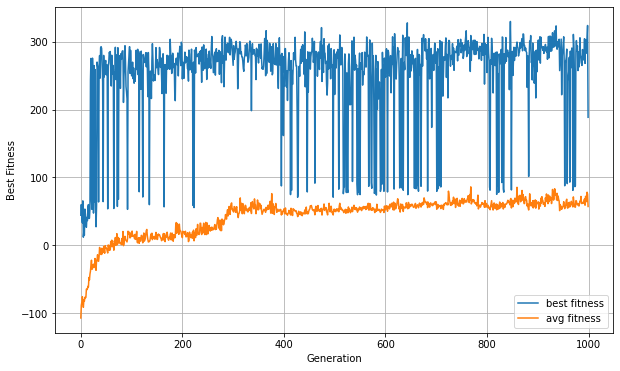

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1000), results['best_fitness_per_gen'], label='best fitness')
ax.plot(np.arange(1000), results['avg_fitness_per_gen'], label='avg fitness')
ax.set_ylabel('Best Fitness')
ax.set_xlabel('Generation')
ax.legend(loc='best')
ax.grid()
plt.savefig('plot_results.png', dpi=500)
plt.show()

In [28]:
env = gym.make("LunarLander-v2")

observation, info = env.reset(seed=np.random.randint(0, 2**16-1), return_info=True)

input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

policy = NN(input_dim=input_dim, output_dim=output_dim, hidden_units=128)
dim = policy.params_size()

# frames = []
policy.set_weights(pop[:dim, 32])

total_reward = 0.0
episodes = 10
for ep in range(episodes):
    done = False
    episode_reward = 0.0
    while not done:
        env.render()
        # frames.append(env.render(mode='rgb_array'))
        action = policy(observation)
        observation, reward, done, info = env.step(action)
        episode_reward += reward
        total_reward += reward

        if done:
            print(f'Episode {ep+1}, Reward {episode_reward}')
            observation, info = env.reset(seed=np.random.randint(0, 2**16-1), return_info=True)

print(f'\nAvg Reward: {total_reward / episodes}')

env.close()
# imageio.mimsave(os.path.join('.', 'movie.gif'), frames, format='GIF', fps=60)

Episode 1, Reward 31.883390521398013
Episode 2, Reward 9.407651576151068
Episode 3, Reward 45.050588219979744
Episode 4, Reward 113.17760663733475
Episode 5, Reward 281.21490090470013
Episode 6, Reward 26.294383699514952
Episode 7, Reward 64.4514162316205
Episode 8, Reward 29.725000241947754
Episode 9, Reward 27.436548107065917
Episode 10, Reward 255.24291563773255

Avg Reward: 88.38844017774498


In [29]:
print(dim*2, pop.shape)
# EvolutionStrategy(hidden_units=16).fitness(pop)[0]

3336 (3336, 100)
